In [1]:
import numpy as np
import argparse
import os, time

from pykin.utils import plot_utils as p_utils

from pytamp.benchmark import Rearrange1
from pytamp.benchmark.rearrange1 import make_scene
from pytamp.search.mcts_for_rearragement import MCTS_rearrangement
from pytamp.utils import point_cloud_utils as pc_utils

def get_parser():
    parser = argparse.ArgumentParser(description="Test Rearragement 1.")
    parser.add_argument("--budgets", metavar="T", type=int, default=30, help="Horizon")
    parser.add_argument("--max_depth", metavar="H", type=int, default=16, help="Max depth")
#     parser.add_argument("--seed", metavar="i", type=int, default=7, help="A random seed")
#     parser.add_argument("--seed", metavar="i", type=int, default=17, help="A random seed")
    parser.add_argument("--seed", metavar="i", type=int, default=22, help="A random seed")
    parser.add_argument(
        "--algo",
        metavar="alg",
        type=str,
        default="bai_perturb",
        choices=["bai_perturb", "bai_ucb", "uct", "random", "greedy"],
        help="Choose one (bai_perturb, bai_ucb, uct)",
    )
    parser.add_argument(
        "--debug_mode", default=False, type=lambda x: (str(x).lower() == "true"), help="Debug mode"
    )
#     parser.add_argument("--box_number", metavar="N", type=int, default=6, help="Box Number(6 or less)")
    try:
        args = parser.parse_args() #call from command line
    except:
        args = parser.parse_args(args=[]) #call from notebook
    return args 

args = get_parser() 

debug_mode = args.debug_mode
# debug_mode = True
budgets = args.budgets
max_depth = args.max_depth
algo = args.algo
seed = args.seed
np.random.seed(seed)

object_names, init_scene, goal_scene = make_scene()
rearrangement1 = Rearrange1('panda', object_names, init_scene, goal_scene, is_pyplot=False)

final_level_1_values = []
final_level_2_values = []
final_optimal_nodes = []
final_pnp_all_joint_paths = []
final_pick_all_objects = []
final_place_all_object_poses = []

# final_optimal_trees = []
c_list = 10 ** np.linspace(-2, 2.0, 10)


2023-08-09 15:28:56.379215: I tensorflow/stream_executor/platform/default/dso_loader.cc:53] Successfully opened dynamic library libcudart.so.11.0
usage: ipykernel_launcher.py [-h] [--budgets T] [--max_depth H] [--seed i]
                             [--algo alg] [--debug_mode DEBUG_MODE]
ipykernel_launcher.py: error: unrecognized arguments: -f /home/juju/.local/share/jupyter/runtime/kernel-2af167ea-1f32-434a-9973-e7ec55f00c9a.json


*********************** Logical States ***********************
OrderedDict([('ben_cube0',
              {'on': Object(name=table, pos=[ 0.9   -0.6    0.043])}),
             ('bottle0',
              {'on': Object(name=table, pos=[ 0.9   -0.6    0.043])}),
             ('can0',
              {'on': Object(name=table, pos=[ 0.9   -0.6    0.043])}),
             ('cereal0',
              {'on': Object(name=table, pos=[ 0.9   -0.6    0.043])}),
             ('table',
              {'static': True,
               'support': [Object(name=ben_cube0, pos=[ 0.55993829 -0.00222162  0.83529998]),
                           Object(name=bottle0, pos=[ 0.68867991 -0.10153264  0.87515735]),
                           Object(name=can0, pos=[0.63874014 0.27988355 0.85059666]),
                           Object(name=cereal0, pos=[ 0.42131868 -0.18766674  0.88526188])]}),
             ('panda_gripper', {'holding': None})])
***************************************************************

****************

In [2]:
rearrangement1.init_scene._support_objects

{'table': <trimesh.Trimesh(vertices.shape=(32, 3), faces.shape=(48, 3))>}

In [3]:
rearrangement1.scene_mngr.scene.benchmark_config

{0: {'object_names': ['ben_cube0', 'bottle0', 'can0', 'cereal0'],
  'goal_scene': {'table': array([[ 1.   ,  0.   ,  0.   ,  0.9  ],
          [ 0.   ,  1.   ,  0.   , -0.6  ],
          [ 0.   ,  0.   ,  1.   ,  0.043],
          [ 0.   ,  0.   ,  0.   ,  1.   ]]),
   'ben_cube0': array([[ 0.45999483,  0.8879216 ,  0.        ,  0.47189415],
          [-0.8879216 ,  0.45999483,  0.        , -0.22862241],
          [ 0.        ,  0.        ,  1.        ,  0.83529998],
          [ 0.        ,  0.        ,  0.        ,  1.        ]]),
   'bottle0': array([[ 0.46694576, -0.88428596,  0.        ,  0.40412951],
          [ 0.88428596,  0.46694576,  0.        , -0.10179989],
          [ 0.        ,  0.        ,  1.        ,  0.87515735],
          [ 0.        ,  0.        ,  0.        ,  1.        ]]),
   'can0': array([[-0.97112962,  0.23855241,  0.        ,  0.6645213 ],
          [-0.23855241, -0.97112962,  0.        , -0.10141758],
          [ 0.        ,  0.        ,  1.        ,  0.8505

In [4]:
rearrangement1.scene_mngr.scene.bench_num

0

In [5]:
# rearrangement1.scene_mngr.scene.objs['ben_cube0'].h_mat  =  list(mcts.rearr_action.get_arbitrary_location('ben_cube0', support_obj_name='ben_cube_support',scene_for_sample=mcts.init_scene, sample_num= 1))[0]['ben_cube_support']

In [6]:
# # #######################
# fig, ax = p_utils.init_3d_figure(name="Rearrangement 1")
# # init_scene
# rearrangement1.scene_mngr.render_scene(ax)
# rearrangement1.render_axis(rearrangement1.scene_mngr)
# rearrangement1.scene_mngr.show()

# # goal_scene
# # rearrangement1.goal_scene_mngr.render_scene(ax)
# # rearrangement1.render_axis(rearrangement1.goal_scene_mngr)
# # rearrangement1.goal_scene_mngr.show()

In [18]:
c = 2.5
idx = 0
mcts = MCTS_rearrangement(
        scene_mngr=rearrangement1.scene_mngr,
        init_scene=rearrangement1.init_scene,
        sampling_method=args.algo,
        budgets=args.budgets,
        max_depth=args.max_depth,
        c=c,
        debug_mode=False,
        use_pick_action=False,
        consider_next_scene=True, 
    )
mcts.only_optimize_1 = False

/home/juju/contact_graspnet/contact_graspnet/config_utils.py:42: YAMLLoadWarning: calling yaml.load() without Loader=... is deprecated, as the default Loader is unsafe. Please read https://msg.pyyaml.org/load for full details.
  global_config = yaml.load(f)


<module 'contact_graspnet.contact_graspnet' from '/home/juju/contact_graspnet/contact_graspnet/contact_graspnet.py'>
--- Get model


ValueError: Variable layer1/conv0_0/weights already exists, disallowed. Did you mean to set reuse=True or reuse=tf.AUTO_REUSE in VarScope?

In [21]:
start_time = time.time()
for i in range(budgets):
# for i in range(10):
    print(
        f"\n[{idx+1}/{len(c_list)}] Benchmark: {rearrangement1.scene_mngr.scene.bench_num}, Algo: {algo}, C: {c}, Seed: {seed}"
    )
    mcts.do_planning_rearrange(i)

    print("########### Running time : ", time.time()- start_time, "##############")
    final_level_1_values.append(mcts.values_for_level_1)



[1/10] Benchmark: 0, Algo: bai_perturb, C: 2.5, Seed: 22
=========== Search iteration : 1 ===========
[Action] Rearr ben_cube0 to table
placed another place not goal
[Reward] S(0) -> A(1) -> S'(96) Reward : -0.1
[Action] Rearr cereal0 to table
Good Action
[Reward] S(96) -> A(101) -> S'(828) Reward : 0.333
[Action] Rearr can0 to table
placed another place not goal
[Reward] S(828) -> A(833) -> S'(2117) Reward : -0.1
[Action] Rearr cereal0 to table
Bad Action
[Reward] S(2117) -> A(2122) -> S'(2123) Reward : -0.5
[Action] Rearr can0 to table
placed another place not goal
[Reward] S(2123) -> A(2127) -> S'(2128) Reward : -0.1
[Action] Rearr cereal0 to table
placed another place not goal
[Reward] S(2128) -> A(2132) -> S'(2134) Reward : -0.1
[Action] Rearr ben_cube0 to table
placed another place not goal
[Reward] S(2134) -> A(2135) -> S'(2140) Reward : -0.1
[Action] Rearr cereal0 to table
placed another place not goal
[Reward] S(2140) -> A(2144) -> S'(2146) Reward : -0.1
[Action] Rearr ben_cu

NetworkXError: The node None is not in the digraph.

In [20]:
mcts.history_level_1_dict

{0: {'nodes': [0,
   1,
   96,
   99,
   102,
   107,
   108,
   110,
   113,
   115,
   117,
   118,
   122,
   126,
   127,
   131,
   133,
   136,
   140,
   142,
   145,
   147,
   150,
   152,
   154,
   157,
   159,
   162,
   164,
   168,
   169],
  'value': 3.0788059163059165},
 1: {'nodes': [0,
   1,
   96,
   101,
   828,
   831,
   834,
   838,
   840,
   845,
   846,
   850,
   852,
   854,
   858,
   859,
   862,
   863,
   866,
   871,
   872,
   875,
   878,
   879,
   881],
  'value': 3.780133755133756},
 2: {'nodes': [0,
   1,
   96,
   101,
   828,
   829,
   882,
   883,
   887,
   890,
   893,
   896,
   897,
   899,
   903,
   904,
   909,
   912,
   916,
   917,
   923,
   925,
   930,
   933,
   937,
   942,
   943,
   945,
   948,
   951,
   952],
  'value': 2.8839285714285703},
 3: {'nodes': [0,
   6,
   419,
   420,
   1027,
   1031,
   1033,
   1034,
   1039,
   1040,
   1044,
   1047,
   1050,
   1052,
   1056,
   1057,
   1061,
   1063,
   1066,
   1070,
  

In [11]:
mcts.history_level_2_dict

{0: {'nodes': [0,
   1,
   96,
   99,
   102,
   107,
   108,
   110,
   113,
   115,
   117,
   118,
   122,
   126,
   127,
   131,
   133,
   136,
   140,
   142,
   145,
   147,
   150,
   152,
   154,
   157,
   159,
   162,
   164,
   168,
   169],
  'value': 3.685506},
 1: {'nodes': [0,
   6,
   419,
   421,
   1072,
   1073,
   1078,
   1081,
   1084,
   1089,
   1090,
   1093,
   1095],
  'value': 5.283957}}

In [10]:
mcts.time_used_in_level_1 ,mcts.time_used_in_level_1_5 ,mcts.time_used_in_level_2 


(24.05579900741577, 44.78515100479126, 524.2479131221771)

In [21]:
mcts.time_used_in_level_1 ,mcts.time_used_in_level_1_5 ,mcts.time_used_in_level_2 


(24.442204475402832, 36.24507141113281, 396.54842877388)

In [12]:
mcts.get_visit_node_num()

21

In [13]:
mcts.infeasible_sub_nodes

[[0,
  1,
  96,
  101,
  828,
  831,
  834,
  838,
  840,
  845,
  846,
  850,
  852,
  854,
  858,
  859,
  862,
  863,
  866,
  871,
  872,
  875,
  878,
  879,
  881],
 [0,
  6,
  419,
  420,
  1027,
  1031,
  1033,
  1034,
  1039,
  1040,
  1044,
  1047,
  1050,
  1052,
  1056,
  1057,
  1061,
  1063,
  1066,
  1070,
  1071]]

In [14]:
max_level_1_value = mcts.get_max_value_level_1()
print(max_level_1_value, mcts.history_level_1_dict)

########## level 1 ##########
if mcts.history_level_1_dict:
    j, max_value_nodes = mcts.get_max_value_nodes_level_1()
    
    print()
    print(f"Result {j} : ", max_value_nodes)
    print("state num :", len(max_value_nodes))
    mcts.render_rearr("_", max_value_nodes)

5.042857142857142 {0: {'nodes': [0, 1, 96, 99, 102, 107, 108, 110, 113, 115, 117, 118, 122, 126, 127, 131, 133, 136, 140, 142, 145, 147, 150, 152, 154, 157, 159, 162, 164, 168, 169], 'value': 3.0788059163059165}, 1: {'nodes': [0, 1, 96, 101, 828, 831, 834, 838, 840, 845, 846, 850, 852, 854, 858, 859, 862, 863, 866, 871, 872, 875, 878, 879, 881], 'value': 3.780133755133756}, 2: {'nodes': [0, 1, 96, 101, 828, 829, 882, 883, 887, 890, 893, 896, 897, 899, 903, 904, 909, 912, 916, 917, 923, 925, 930, 933, 937, 942, 943, 945, 948, 951, 952], 'value': 2.8839285714285703}, 3: {'nodes': [0, 6, 419, 420, 1027, 1031, 1033, 1034, 1039, 1040, 1044, 1047, 1050, 1052, 1056, 1057, 1061, 1063, 1066, 1070, 1071], 'value': 3.8270202020202015}, 4: {'nodes': [0, 6, 419, 421, 1072, 1073, 1078, 1081, 1084, 1089, 1090, 1093, 1095], 'value': 5.042857142857142}, 5: {'nodes': [0, 6, 419, 422, 1096, 1098, 1101, 1106, 1107, 1108, 1112, 1113, 1117, 1120, 1122, 1127, 1128, 1130, 1135, 1141, 1142, 1143, 1148, 1149, 1

In [17]:
max_value_nodes = mcts.get_minimum_cost_node()

In [18]:
mcts.infeasible_sub_nodes

[]

# Contact graspnet 사용 하는 버전 전용 디버깅

## 실패를 했음. 그 와중에 Level 1.5는 다 생성했음. 

nodes [0, 7, 466, 468, 1937, 1939, 1941, 1944, 1946]


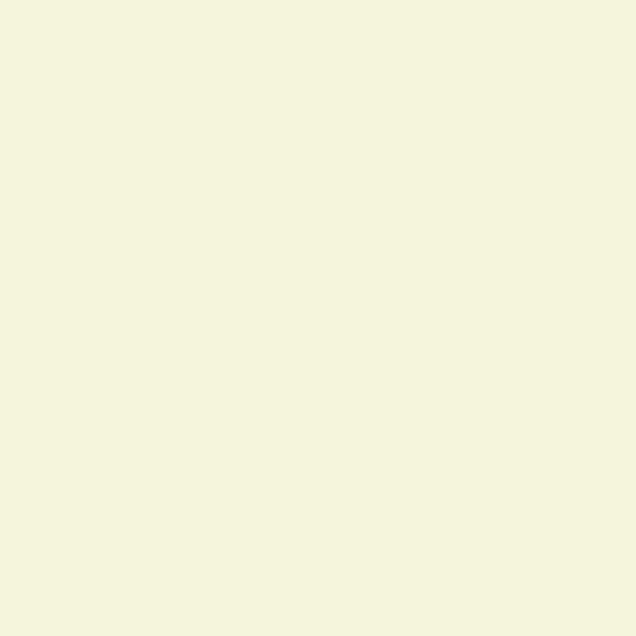

In [19]:
max_level_1_value = mcts.get_max_value_level_1()


fig, ax = p_utils.init_3d_figure(name="Level wise 1")

# nodes = mcts.infeasible_sub_nodes[0]
# nodes = mcts.history_level_1_dict[4]['nodes']
j, nodes = mcts.get_max_value_nodes_level_1()

print("nodes", nodes)
i = 0
for i in range(len(nodes)//2):
    mcts.rearr_action.deepcopy_scene(mcts.tree.nodes[nodes[2*(i)+1]]['state'])
    
    grasp = mcts.tree.nodes[nodes[2*(i)+1]].get('grasp_poses')
    if grasp:
        grasp = grasp[0]['grasp']
    else:
        print("Here doesn't have grasp")
        
        mcts.rearr_action.scene_mngr.render_objects(ax)
        p_utils.plot_basis(ax)
        mcts.rearr_action.show()
        break
    mcts.rearr_action.scene_mngr.set_gripper_pose(grasp)
    
    gripper_kinematics_info = mcts.rearr_action.scene_mngr.scene.robot.gripper.get_gripper_fk()

    gripper_tip_poses = mcts.scene_mngr.scene.robot.gripper.compute_gripper_tip_pose_from_gripper_pose()


    mcts.rearr_action.scene_mngr.render_axis(ax, gripper_kinematics_info['leftfinger'])
    mcts.rearr_action.scene_mngr.render_axis(ax, gripper_kinematics_info['rightfinger'])
    mcts.rearr_action.scene_mngr.render_axis(ax, mcts.scene_mngr.scene.robot.gripper.compute_gripper_tip_pose_from_gripper_pose(gripper_kinematics_info['rightfinger']))
    mcts.rearr_action.scene_mngr.render_axis(ax, mcts.scene_mngr.scene.robot.gripper.compute_gripper_tip_pose_from_gripper_pose(gripper_kinematics_info['leftfinger']))

    mcts.rearr_action.scene_mngr.render_axis(ax, mcts.rearr_action.scene_mngr.scene.robot.gripper.get_gripper_tcp_pose())
    mcts.rearr_action.scene_mngr.render_gripper(ax)

    mcts.rearr_action.scene_mngr.render_objects(ax)
    p_utils.plot_basis(ax)
    mcts.rearr_action.show()

각 node에서 생성한 grasp을 inverse kinematics를 풀어보자 


엄청 쉬워보이는 자세인데 왜 IK 실패를 할까

In [39]:
def show_curernt_scene(q, pose):
    fig, ax = p_utils.init_3d_figure(name="Level wise 1")
    
    mcts.rearr_action.scene_mngr.set_robot_eef_pose(q)
    mcts.rearr_action.scene_mngr.render_axis(ax, mcts.rearr_action.scene_mngr.scene.robot.gripper.get_gripper_pose())
    mcts.rearr_action.scene_mngr.render_gripper(ax)
    
    mcts.rearr_action.scene_mngr.set_gripper_pose(pose)
    mcts.rearr_action.scene_mngr.render_axis(ax, mcts.rearr_action.scene_mngr.scene.robot.gripper.get_gripper_pose())
    mcts.rearr_action.scene_mngr.render_gripper(ax)

    mcts.rearr_action.scene_mngr.render_objects(ax)
    p_utils.plot_basis(ax)
    mcts.rearr_action.show()

In [8]:
total_ = 0
for i in range(6):
    total_ += 6/(i+1)

total_


14.7

In [9]:
mcts.tree.nodes[0]

NameError: name 'mcts' is not defined

여기서 실패가 나는게 말이 안됨..

In [40]:
default_thetas = mcts.rearr_action.scene_mngr.scene.robot.init_qpos

for _, i in enumerate(nodes):
    if _ < 1:
        continue
    if _%2 == 1:
        continue
        
    print("Current state node num : ",i)
    print("Current state is came from last action")
    
    mcts.rearr_action.deepcopy_scene(mcts.tree.nodes[nodes[2*_-1]]['state'])

    last_action_node = mcts.tree.nodes[nodes[2*_+1]]
    current_state_node = mcts.tree.nodes[i]
    
    print(current_state_node['action']['pre_grasp'])
    pre_grasp_pose = current_state_node['action']['pre_grasp']
    grasp_pose = current_state_node['action']['grasp']
    post_grasp_pose = current_state_node['action']['post_grasp']
    
    pre_release_pose = current_state_node['action']['pre_release']
    release_pose = current_state_node['action']['release']
    post_release_pose = current_state_node['action']['post_release']
    
    obj_release_pose = current_state_node['action']['table']
    # Set Scene
    mcts.rearr_action.scene_mngr.set_robot_eef_pose(default_thetas)
    rearr_obj_name = current_state_node['state'].rearr_obj_name
    rearr_default_pose = current_state_node['state'].rearr_obj_default_pose
    print("rearr_obj_name : ", rearr_obj_name)
    
    mcts.rearr_action.scene_mngr.set_object_pose(rearr_obj_name, rearr_default_pose)

    show_curernt_scene(default_thetas ,pre_grasp_pose)
    print("default 부터 Pre grasp까지 IK 품")
    
    goal_q = mcts.rearr_action.scene_mngr.scene.robot.inverse_kin(
            default_thetas, pre_grasp_pose, max_iter=100
        )
    
    show_curernt_scene(goal_q, grasp_pose)
    print("pre_grasp 부터 grasp까지 IK 품")
    goal_q = mcts.rearr_action.scene_mngr.scene.robot.inverse_kin(
        goal_q, grasp_pose, max_iter=100
    )
    
    show_curernt_scene(goal_q, post_grasp_pose)
    print("grasp 부터 post_grasp까지 IK 품")
    goal_q = mcts.rearr_action.scene_mngr.scene.robot.inverse_kin(
        goal_q, post_grasp_pose, max_iter=100
    )
    
    mcts.rearr_action.scene_mngr.set_robot_eef_pose(default_thetas)

    mcts.rearr_action.scene_mngr.set_object_pose(rearr_obj_name, obj_release_pose)

    show_curernt_scene(default_thetas, post_release_pose)
    print("default 부터 post_release까지 IK 품")
    goal_q = mcts.rearr_action.scene_mngr.scene.robot.inverse_kin(
        default_thetas, pre_release_pose, max_iter=100
    )
    
    show_curernt_scene(goal_q, release_pose)
    print("release 부터 post_release까지 IK 품")
    goal_q = mcts.rearr_action.scene_mngr.scene.robot.inverse_kin(
        goal_q, release_pose, max_iter=100
    )
    
    show_curernt_scene(goal_q, post_release_pose)
    print("post_release 부터 post_release까지 IK 품")
    goal_q = mcts.rearr_action.scene_mngr.scene.robot.inverse_kin(
        goal_q, release_pose, max_iter=100
    )
    
    break

Current state node num :  10
Current state is came from last action
[[ 1.7347235e-18  3.7369016e-01  9.2755359e-01  2.7714780e-01]
 [-4.5109000e-02  9.2660940e-01 -3.7330979e-01 -1.5398476e-01]
 [-9.9898207e-01 -4.1841015e-02  1.6856790e-02  8.5422677e-01]
 [ 0.0000000e+00  0.0000000e+00  0.0000000e+00  1.0000000e+00]]


KeyError: 'pre_release'

In [41]:
########## level 1 ##########
if mcts.history_level_2_dict:
    j, max_value_nodes = mcts.get_max_value_nodes_level_1()
    print(f"Result {j} : ", max_value_nodes)
    print("state num :", len(max_value_nodes))
    mcts.render_rearr("_", max_value_nodes)

In [68]:
mcts.tree.nodes[172]['action']['rearr_poses'][0][0]

{'release': array([[-0.035319  ,  0.49304995, -0.8692838 ,  0.6695346 ],
        [ 0.02806048, -0.8689943 , -0.49402586,  0.3249112 ],
        [-0.9989821 , -0.04184102,  0.01685679,  0.85591245],
        [ 0.        ,  0.        ,  0.        ,  1.        ]],
       dtype=float32),
 'pre_release': array([[-0.035319  ,  0.49304995, -0.8692838 ,  0.6695346 ],
        [ 0.02806048, -0.8689943 , -0.49402586,  0.3249112 ],
        [-0.9989821 , -0.04184102,  0.01685679,  0.90591246],
        [ 0.        ,  0.        ,  0.        ,  1.        ]],
       dtype=float32),
 'post_release': array([[-0.035319  ,  0.49304995, -0.8692838 ,  0.7129988 ],
        [ 0.02806048, -0.8689943 , -0.49402586,  0.3496125 ],
        [-0.9989821 , -0.04184102,  0.01685679,  0.85506964],
        [ 0.        ,  0.        ,  0.        ,  1.        ]],
       dtype=float32)}

# Pick action 사용하는 버전 전용 디버깅

nodes [0, 1, 29, 136, 137, 139, 211, 214, 215, 218, 219, 223, 224, 225, 231, 236, 237, 238, 243, 247, 248, 251, 255, 258, 259, 260, 267, 268, 269]
1
136
139
214
218
223
225
236
238
247
251
258
260
268


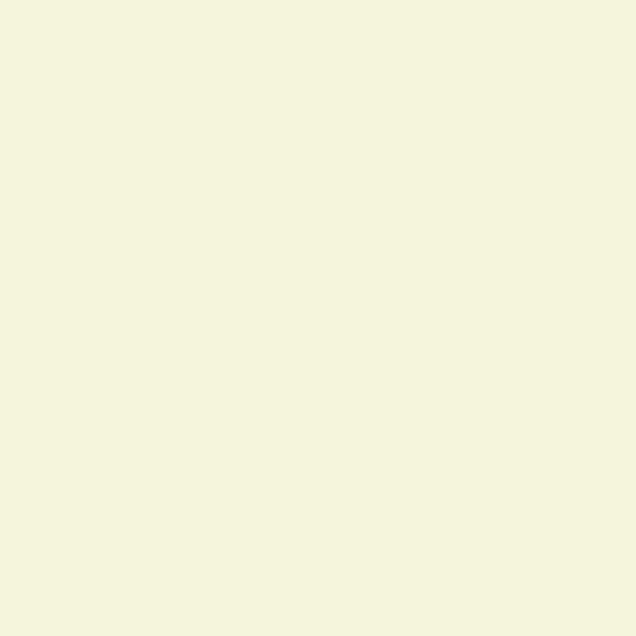

In [10]:
max_level_1_value = mcts.get_max_value_level_1()

fig, ax = p_utils.init_3d_figure(name="Level wise 1")

j, nodes = mcts.get_max_value_nodes_level_1()

print("nodes", nodes)
i = 0
for i in range(len(nodes)//2):
    print(nodes[2*(i)+1])
    mcts.rearr_action.deepcopy_scene(mcts.tree.nodes[nodes[2*(i)+1]]['state'])
    
    action_type = mcts.tree.nodes[nodes[2*(i)+1]].get('action').get('type')
    if action_type == 'pick':
        grasp = mcts.tree.nodes[nodes[2*(i)+1]].get('action').get('grasp_poses')
        if grasp:
            grasp = grasp[0]['grasp']
        else:
            print("Here doesn't have grasp")
            mcts.rearr_action.scene_mngr.render_objects(ax)
            p_utils.plot_basis(ax)
            mcts.rearr_action.show()
            break
    if action_type == 'rearr':
        grasp = mcts.tree.nodes[nodes[2*(i)+1]].get('action').get('rearr_poses')[0]
        if grasp:
            grasp = grasp[0].get('release')
        else:
            print("Here doesn't have grasp")

            mcts.rearr_action.scene_mngr.render_objects(ax)
            p_utils.plot_basis(ax)
            mcts.rearr_action.show()
            break
    mcts.rearr_action.scene_mngr.set_gripper_pose(grasp)
    
    gripper_kinematics_info = mcts.rearr_action.scene_mngr.scene.robot.gripper.get_gripper_fk()

    gripper_tip_poses = mcts.scene_mngr.scene.robot.gripper.compute_gripper_tip_pose_from_gripper_pose()


    mcts.rearr_action.scene_mngr.render_axis(ax, gripper_kinematics_info['leftfinger'])
    mcts.rearr_action.scene_mngr.render_axis(ax, gripper_kinematics_info['rightfinger'])
    mcts.rearr_action.scene_mngr.render_axis(ax, mcts.scene_mngr.scene.robot.gripper.compute_gripper_tip_pose_from_gripper_pose(gripper_kinematics_info['rightfinger']))
    mcts.rearr_action.scene_mngr.render_axis(ax, mcts.scene_mngr.scene.robot.gripper.compute_gripper_tip_pose_from_gripper_pose(gripper_kinematics_info['leftfinger']))

    mcts.rearr_action.scene_mngr.render_axis(ax, mcts.rearr_action.scene_mngr.scene.robot.gripper.get_gripper_tcp_pose())
    mcts.rearr_action.scene_mngr.render_gripper(ax)

    mcts.rearr_action.scene_mngr.render_objects(ax)
    p_utils.plot_basis(ax)
    mcts.rearr_action.show()

In [15]:
max_value_nodes = mcts.get_minimum_cost_node()

## Save path 

In [16]:
final_level_1_values = []
final_level_2_values = []
final_optimal_nodes = []
final_pnp_all_joint_paths = []
final_pick_all_objects = []
final_place_all_object_poses = []
if mcts.level_wise_2_success:
    (
        pnp_all_joint_paths,
        pick_all_objects,
        place_all_object_poses,
    ) = mcts.get_all_joint_path(max_value_nodes)
    final_pnp_all_joint_paths.append(pnp_all_joint_paths)
    final_pick_all_objects.append(pick_all_objects)
    final_place_all_object_poses.append(place_all_object_poses)
    final_optimal_nodes.append(mcts.optimal_nodes)
else:
    final_pnp_all_joint_paths.append([])
    final_pick_all_objects.append([])
    final_place_all_object_poses.append([])
    final_optimal_nodes.append([])

In [17]:
final_pnp_all_joint_paths

[[[OrderedDict([('pre_grasp',
                 [array([-0.01044595, -0.46099348, -0.02165278, -2.67804735, -0.01564166,
                          2.28116664, -0.71192364]),
                  array([-0.02089191, -0.38350878, -0.04330556, -2.66196411, -0.03128333,
                          2.34121821, -0.63844912]),
                  array([-0.03133786, -0.30602408, -0.06495835, -2.64588086, -0.04692499,
                          2.40126978, -0.56497459]),
                  array([-0.04178382, -0.22853938, -0.08661113, -2.62979761, -0.06256666,
                          2.46132135, -0.49150007]),
                  array([-0.05222977, -0.15105468, -0.10826391, -2.61371436, -0.07820832,
                          2.52137292, -0.41802554]),
                  array([-0.06267573, -0.07356998, -0.12991669, -2.59763112, -0.09384999,
                          2.58142449, -0.34455102]),
                  array([-0.07312168,  0.00391472, -0.15156948, -2.58154787, -0.10949165,
                      

In [28]:
for i in max_value_nodes:
    if not mcts.tree.nodes[i]['level1_5']:
        print("Error 1.5", i)
for i in max_value_nodes:
    if not mcts.tree.nodes[i]['level2']:
        print("Error 2", i)
        

Error 1.5 1291


0 scene
100 scene
200 scene
300 scene
400 scene
500 scene
600 scene
700 scene
Animation Finished..
PWD :  /home/juju/pytamp/examples/doosan/action/rearrangement1/movie_dir
Save finished..


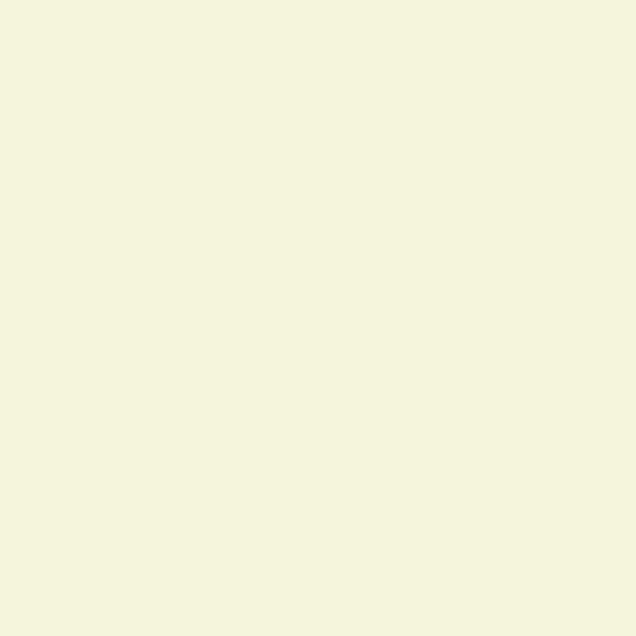

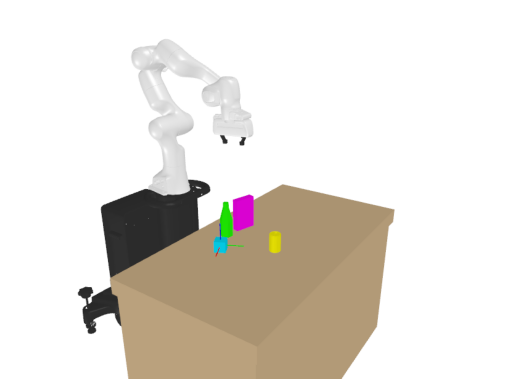

In [29]:
from pykin.utils.kin_utils import apply_robot_to_scene

mcts.rearr_action.scene_mngr.render.render_objects(mcts.tree.nodes[0]['state'].objs)
# pick.scene_mngr.render.trimesh_scene = apply_robot_to_scene(
#         trimesh_scene=pick.scene_mngr.render.trimesh_scene, 
#         robot=pick.scene_mngr.scene.robot,
#         geom="visual"
#             )
# pick.scene_mngr.render.set_camera_view()

mcts.rearr_action.simulate_path(
    final_pnp_all_joint_paths[0],
    final_pick_all_objects[0],
    final_place_all_object_poses[0],
    is_save=True,
#     video_name="pick_rearrangement1_only_current_scene",
    video_name="pick_rearrangement1_consider_next_scene_minimum_cost_nodes",
)


In [20]:
count = 0
for i in mcts.tree.nodes:
    if mcts.tree.nodes[i]['visit']>1:
        count += 1
count

24

In [7]:
count = 0
for i in mcts.tree.nodes:
    if mcts.tree.nodes[i]['visit']>1:
        count += 1
count

17

In [30]:
for i in raz

{'depth': 1,
 'state': <pytamp.scene.scene.Scene at 0x7fda17004a00>,
 'action': {'type': 'pick',
  'pick_obj_name': 'can0',
  'grasp_poses': [{'grasp': array([[ 0.        ,  0.59427848,  0.80425934,  0.38289493],
           [ 0.00525198,  0.80424825, -0.59427028, -0.17083556],
           [-0.99998621,  0.00422396, -0.00312114,  0.86611772],
           [ 0.        ,  0.        ,  0.        ,  1.        ]]),
    'pre_grasp': array([[ 0.        ,  0.59427845,  0.80425936,  0.30246902],
           [ 0.00525198,  0.8042483 , -0.5942703 , -0.11140853],
           [-0.99998623,  0.00422396, -0.00312114,  0.8664298 ],
           [ 0.        ,  0.        ,  0.        ,  1.        ]],
          dtype=float32),
    'post_grasp': array([[ 0.        ,  0.59427845,  0.80425936,  0.38289493],
           [ 0.00525198,  0.8042483 , -0.5942703 , -0.17083555],
           [-0.99998623,  0.00422396, -0.00312114,  0.96611774],
           [ 0.        ,  0.        ,  0.        ,  1.        ]],
          dtype

In [28]:
nodes = [0, 3, 10, 172, 173, 175, 180, 388, 389, 392, 591, 592, 593, 594, 598, 601, 602, 604, 607, 609, 610]

In [33]:
for i in nodes:
    print(mcts.tree.nodes[i]["level2"])

True
True
True
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False



# Level 1에서 무조건 좋아질 조합 찾고 Path 계산해도 Cost가 무조건 좋아져야하는데 안됨. 

분석  : 이미 성공한 list에서 cost 계산


In [62]:
mcts.get_best_node()

[0, 1, 82, 84, 88, 94, 1254, 1256, 1473, 1476, 1478]

In [63]:
max_value_nodes

[0, 4, 205, 206, 706, 709, 1608, 1610, 1614, 1618, 1619]

In [20]:
def get_minimum_cost_node():
    min_cost = 100
    min_cost_nodes = []
    for i, n in mcts.history_level_2_dict.items():
        cost = 0
        print(i,n)
        for n_num in n['nodes']:
            cost += mcts.tree.nodes[n_num].get('cost')
        if min_cost > cost:
            min_cost = cost
            min_cost_nodes = n['nodes']
    return min_cost_nodes
        

In [21]:
get_minimum_cost_node()

0 {'nodes': [0, 7, 446, 449, 644, 645, 650, 654, 656, 661, 662, 664, 668, 669, 674, 678, 679, 682, 684], 'value': 8.053283}
1 {'nodes': [0, 7, 446, 449, 644, 647, 802, 804, 808, 812, 814, 818, 819, 822, 823, 825, 828, 832, 833, 837, 838], 'value': 8.525124}
2 {'nodes': [0, 7, 446, 449, 644, 648, 839, 843, 845, 846, 849], 'value': 14.897667}
3 {'nodes': [0, 7, 446, 449, 644, 648, 839, 841, 1193, 1194, 1196], 'value': 14.938767}
4 {'nodes': [0, 7, 446, 450, 452, 454, 1487, 1490, 1492], 'value': 14.938767}


[0, 7, 446, 450, 452, 454, 1487, 1490, 1492]